# Credit Card Fraud Detection

## About Dataset

* Dataset (creditcard.csv) contains transactions made by credit cards in September 2013 by European cardholders.
* Dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
* Dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
* Features <code>V1 - V28</code> are principle components obtained with Principal Component Analysis (PCA: dimensionality-reduction method used to reduce the dimensionality of large data sets)
* Feature <code>Time</code> contains the seconds elapsed between each transaction adn the first transaction in the dataset.
* Feature <code>Amount</code> is the transaction amount.
* Feature <code>Class</code> is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [496]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ensure all dataframe columns are shown in full
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Import Data

In [497]:
file = "creditcard.csv"
df = pd.read_csv(file)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Wrangling and Exploratory Data Analysis

In [499]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

All columns are in numerical datatypes

In [500]:
df.isnull().sum().max()

0

There are no null values in the dataset

In [501]:
df["Class"].count()

284807

In [502]:
print("There are", df["Class"].value_counts()[0], "valid payments, representing", round(df["Class"].value_counts()[0] / df["Class"].count() * 100, 2), "% of the total dataset")
print("There are", df["Class"].value_counts()[1], "fraudulent payments, representing", round(df["Class"].value_counts()[1] / df["Class"].count() * 100, 2), "% of the total dataset")

There are 284315 valid payments, representing 99.83 % of the total dataset
There are 492 fraudulent payments, representing 0.17 % of the total dataset


In [503]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

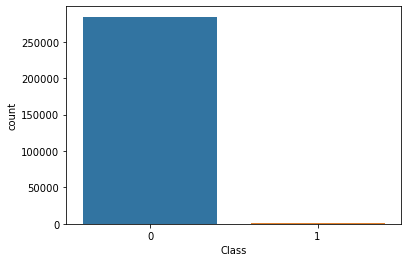

In [504]:
sns.countplot(data = df, x = "Class")

Because of the imbalanced nature of this data set (nearly all sampels are non-fraudulent), predictive models will be prone to overfitting since they will assume that most transactions are no fraudulent.  

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


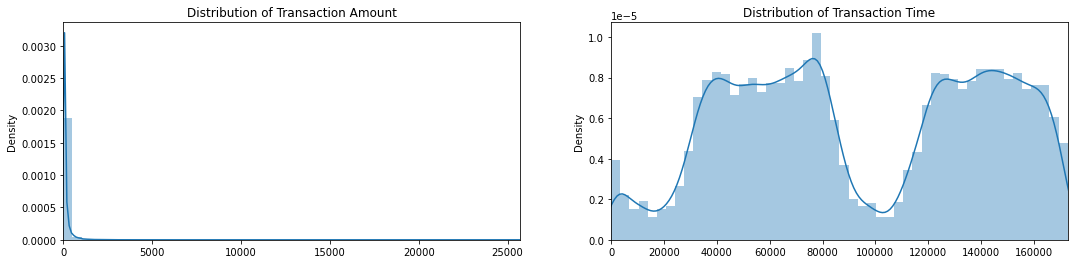

In [505]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.distplot(df["Amount"].values, ax = ax[0])
ax[0].set_title("Distribution of Transaction Amount")
ax[0].set_xlim(df["Amount"].values.min(), df["Amount"].values.max())


sns.distplot(df["Time"].values, ax = ax[1])
ax[1].set_title("Distribution of Transaction Time")
ax[1].set_xlim(df["Time"].values.min(), df["Time"].values.max())

plt.show()

In [506]:
from sklearn.preprocessing import StandardScaler
df["Amount_Norm"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time_Norm"] = StandardScaler().fit_transform(df["Time"].values.reshape(-1, 1))

In [507]:
df.drop(["Amount", "Time"], axis = 1, inplace = True)

In [508]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Norm,Time_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## Random Under-Sampling

Removing data in order to create a more balanced dataset that will prevent overfitting in predictive models

In [513]:
# From a randomly shuffled selection from the dataframe, create equally sized dataframes of fraudulent and valid payments
df_rand = df.sample(frac = 1)
df_fraud = df_rand[df_rand["Class"] == 1]
df_valid = df_rand[df_rand["Class"] == 0][0:len(df_fraud)]

In [514]:
len(df_fraud) == len(df_valid)

True

Now, there are two equally-sized datasets of fraudulent and valid transactions

In [515]:
# Create new dataframe that is the shuffled combination of the two dataframes
df1 = pd.concat([df_fraud, df_valid]).sample(frac = 1, random_state = 42)

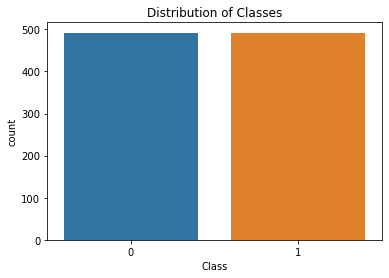

In [516]:
sns.countplot(data = df1, x = "Class")
plt.title("Distribution of Classes")
plt.show()

Now, there is one dataframe of randomly shuffled samples with an equal distribution of fraudulent and valid payments 

## Exploratory Data Analysis

#### Correlation Matrices

Correlation maticies show the correlations of each variable in a dataframe with one another.

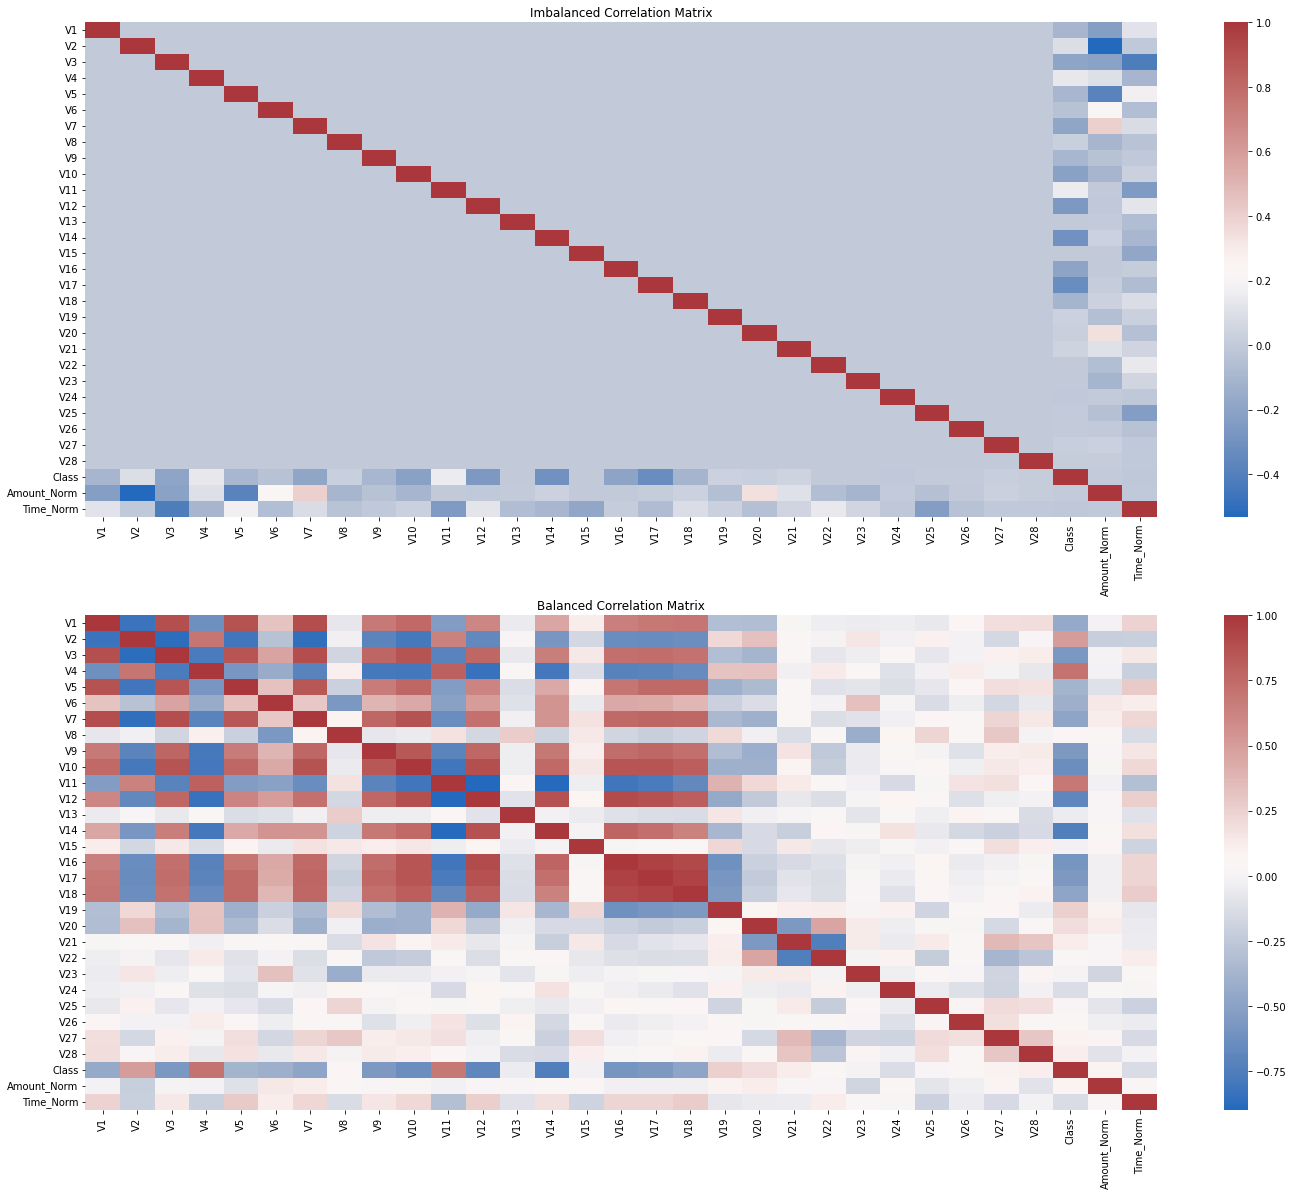

In [517]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (24, 20))

sns.heatmap(df.corr(), cmap = "vlag", ax = ax1)
ax1.set_title("Imbalanced Correlation Matrix")

sns.heatmap(df1.corr(), cmap = "vlag", ax = ax2)
ax2.set_title("Balanced Correlation Matrix")

plt.show()

Takeaways from Balanced Correlation Matrix:
* Positive Correlations with Class (Correlated with Fraud): V2, V4, V11, V19
* Negative Correlations with Class (Correlated with Valid): V10, V12. V14, V17

#### Boxplots

Text(0.5, 1.0, 'V17 vs Class (Negative Correlation)')

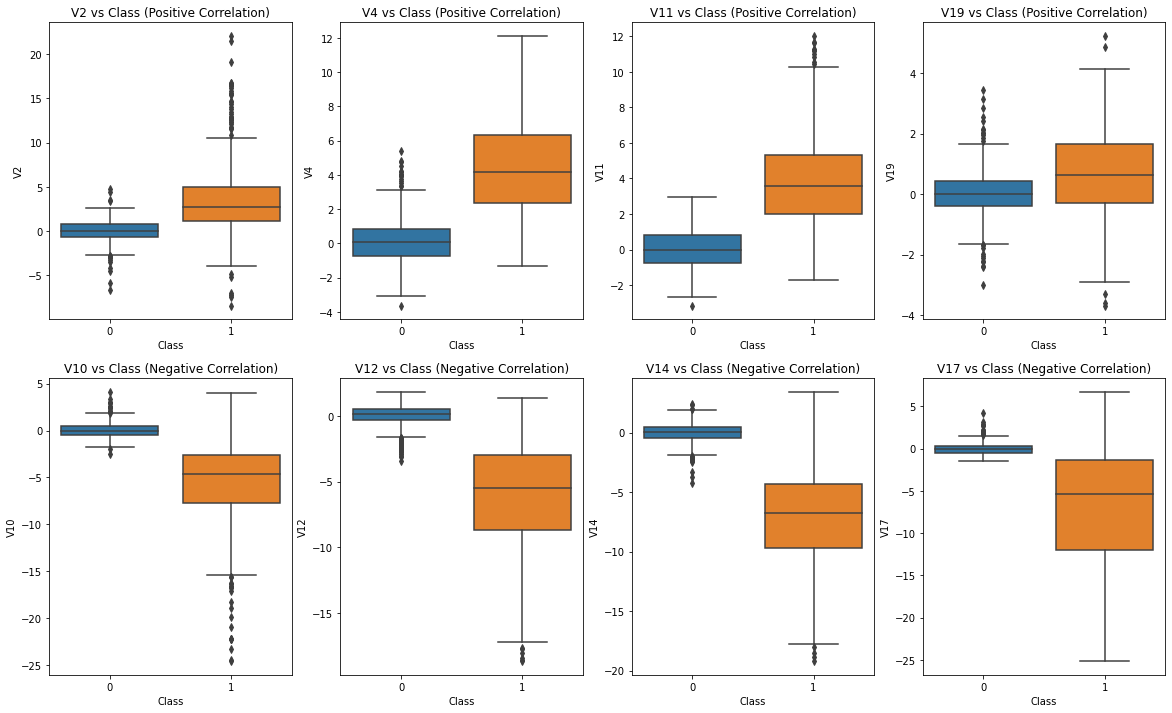

In [518]:
fig, (axes1, axes2) = plt.subplots(2, 4, figsize = (20, 12))

# Positive Correlations

sns.boxplot(data = df1, x = "Class", y = "V2", ax = axes1[0])
axes1[0].set_title("V2 vs Class (Positive Correlation)")

sns.boxplot(data = df1, x = "Class", y = "V4", ax = axes1[1])
axes1[1].set_title("V4 vs Class (Positive Correlation)")

sns.boxplot(data = df1, x = "Class", y = "V11", ax = axes1[2])
axes1[2].set_title("V11 vs Class (Positive Correlation)")

sns.boxplot(data = df1, x = "Class", y = "V19", ax = axes1[3])
axes1[3].set_title("V19 vs Class (Positive Correlation)")

# Negative Correlations

sns.boxplot(data = df1, x = "Class", y = "V10", ax = axes2[0])
axes2[0].set_title("V10 vs Class (Negative Correlation)")

sns.boxplot(data = df1, x = "Class", y = "V12", ax = axes2[1])
axes2[1].set_title("V12 vs Class (Negative Correlation)")

sns.boxplot(data = df1, x = "Class", y = "V14", ax = axes2[2])
axes2[2].set_title("V14 vs Class (Negative Correlation)")

sns.boxplot(data = df1, x = "Class", y = "V17", ax = axes2[3])
axes2[3].set_title("V17 vs Class (Negative Correlation)")

Takeaways from boxplots:
* Correlation of highly correlated features is confirmed
* Highly correlated features have a number of outliers which can be eliminated to improve the accuracy of models

## Anomoly Detection 

Removing outliers based on a distance from the IQR. Determine outliers to remove by applying a multiple to the IQR that is high enough as to not risk information loss from the removal of useful data points, but not to too high as to keep anamalous data (extreme outliers) that will diminisht model accuracy. 

#### Visualize distributions of fraudulent payments to determine which features will be used to eliminate outliers

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'V17 Fraud Distribution')

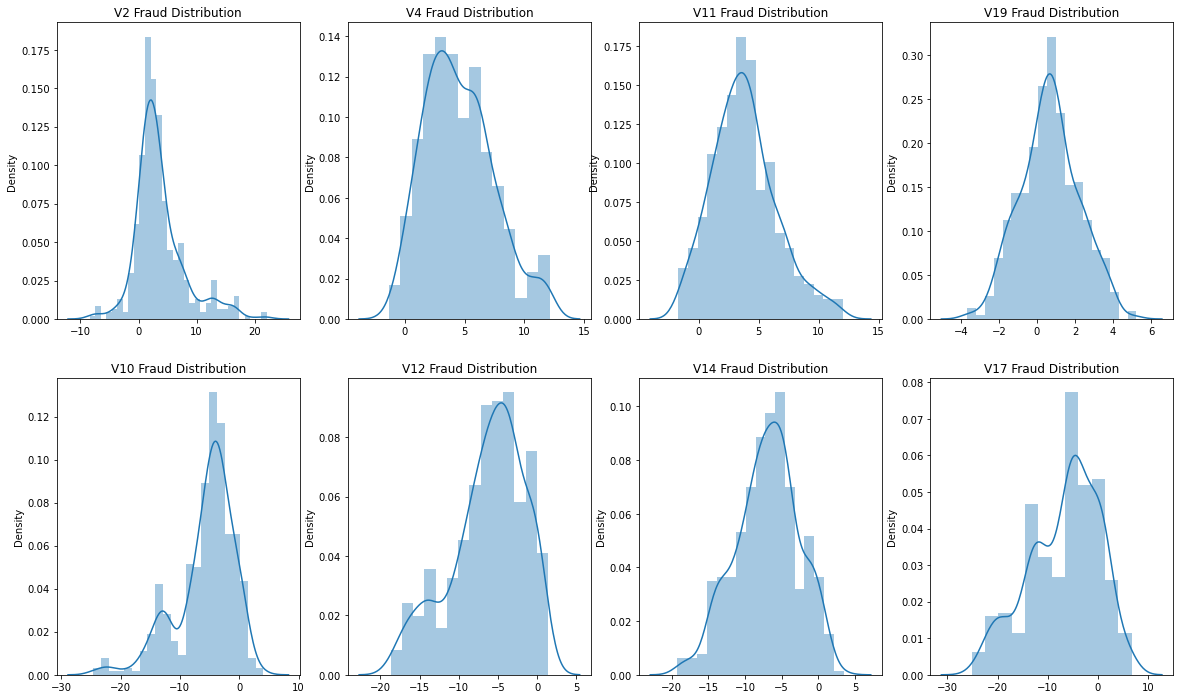

In [519]:
fig, (axes1, axes2) = plt.subplots(2, 4, figsize = (20, 12))

# Positive Correlations

v2_fraud = df1["V2"].loc[df1["Class"] == 1].values
sns.distplot(v2_fraud, ax = axes1[0])
axes1[0].set_title("V2 Fraud Distribution")

v4_fraud = df1["V4"].loc[df1["Class"] == 1].values
sns.distplot(v4_fraud, ax = axes1[1])
axes1[1].set_title("V4 Fraud Distribution")

v11_fraud = df1["V11"].loc[df1["Class"] == 1].values
sns.distplot(v11_fraud, ax = axes1[2])
axes1[2].set_title("V11 Fraud Distribution")

v19_fraud = df1["V19"].loc[df1["Class"] == 1].values
sns.distplot(v19_fraud, ax = axes1[3])
axes1[3].set_title("V19 Fraud Distribution")

# Negative Correlations

v10_fraud = df1["V10"].loc[df1["Class"] == 1].values
sns.distplot(v10_fraud, ax = axes2[0])
axes2[0].set_title("V10 Fraud Distribution")

v12_fraud = df1["V12"].loc[df1["Class"] == 1].values
sns.distplot(v12_fraud, ax = axes2[1])
axes2[1].set_title("V12 Fraud Distribution")

v14_fraud = df1["V14"].loc[df1["Class"] == 1].values
sns.distplot(v14_fraud, ax = axes2[2])
axes2[2].set_title("V14 Fraud Distribution")

v17_fraud = df1["V17"].loc[df1["Class"] == 1].values
sns.distplot(v17_fraud, ax = axes2[3])
axes2[3].set_title("V17 Fraud Distribution")

#### Drop outliers from the dataset that are beyond the IQR threshhold (multiple of IQR)

In [520]:
df1.shape

(984, 31)

In [521]:
v10_fraud = df1["V10"].loc[df1["Class"] == 1].values
v10_q25, v10_q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75) 
v10_IQR = v10_q75 - v10_q25
v10_cutoff = v10_IQR * 1.5
v10_lower, v10_upper = v10_q25 - v10_cutoff, v10_q75 + v10_cutoff
v10_outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print("There are", len(v10_outliers), "outliers in V10")
df1.drop(df1[(df1["V10"] < v10_lower) | (df1["V10"] > v10_upper)].index, axis = 0, inplace = True)

v12_fraud = df1["V12"].loc[df1["Class"] == 1].values
v12_q25, v12_q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75) 
v12_IQR = v12_q75 - v12_q25
v12_cutoff = v12_IQR * 1.5
v12_lower, v12_upper = v12_q25 - v12_cutoff, v12_q75 + v12_cutoff
v12_outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print("There are", len(v12_outliers), "outliers in V12")
df1.drop(df1[(df1["V12"] < v12_lower) | (df1["V12"] > v12_upper)].index, axis = 0, inplace = True)

v14_fraud = df1["V14"].loc[df1["Class"] == 1].values
v14_q25, v14_q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75) 
v14_IQR = v14_q75 - v14_q25
v14_cutoff = v14_IQR * 1.5
v14_lower, v14_upper = v14_q25 - v14_cutoff, v14_q75 + v14_cutoff
v14_outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print("There are", len(v14_outliers), "outliers in V14")
df1.drop(df1[(df1["V14"] < v14_lower) | (df1["V14"] > v14_upper)].index, axis = 0, inplace = True)

print("Total Outliers =", len(v10_outliers) + len(v12_outliers) + len(v14_outliers))

There are 19 outliers in V10
There are 13 outliers in V12
There are 5 outliers in V14
Total Outliers = 37


In [522]:
df1.shape

(947, 31)

37 outliers have been eliminated from the dataset 

#### Re-visualize feature distribution

Text(0.5, 1.0, 'V17 vs Class (- Corr, Outliers Removed)')

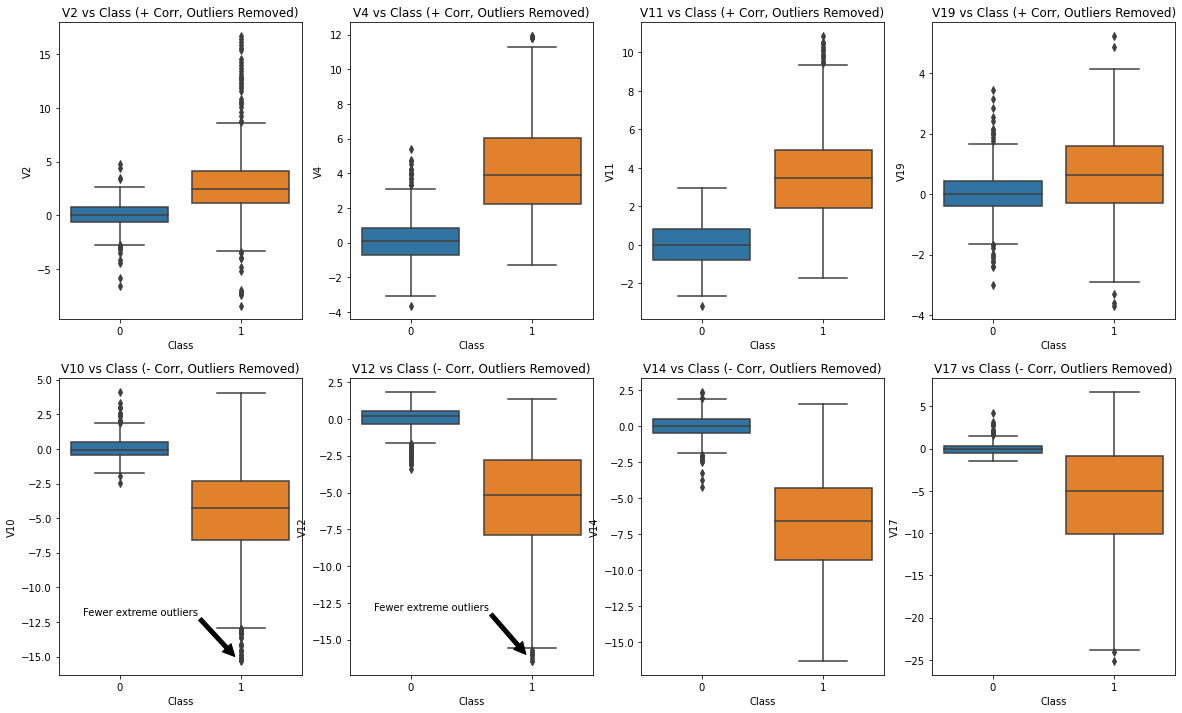

In [523]:
fig, (axes1, axes2) = plt.subplots(2, 4, figsize = (20, 12))

# Positive Correlations

sns.boxplot(data = df1, x = "Class", y = "V2", ax = axes1[0])
axes1[0].set_title("V2 vs Class (+ Corr, Outliers Removed)")

sns.boxplot(data = df1, x = "Class", y = "V4", ax = axes1[1])
axes1[1].set_title("V4 vs Class (+ Corr, Outliers Removed)")

sns.boxplot(data = df1, x = "Class", y = "V11", ax = axes1[2])
axes1[2].set_title("V11 vs Class (+ Corr, Outliers Removed)")

sns.boxplot(data = df1, x = "Class", y = "V19", ax = axes1[3])
axes1[3].set_title("V19 vs Class (+ Corr, Outliers Removed)")

# Negative Correlations

sns.boxplot(data = df1, x = "Class", y = "V10", ax = axes2[0])
axes2[0].set_title("V10 vs Class (- Corr, Outliers Removed)")
axes2[0].annotate("Fewer extreme outliers", xy = (0.95, -15), xytext = (-0.3, -12), arrowprops = dict(facecolor = "black"))

sns.boxplot(data = df1, x = "Class", y = "V12", ax = axes2[1])
axes2[1].set_title("V12 vs Class (- Corr, Outliers Removed)")
axes2[1].annotate("Fewer extreme outliers", xy = (0.95, -16), xytext = (-0.3, -13), arrowprops = dict(facecolor = "black"))

sns.boxplot(data = df1, x = "Class", y = "V14", ax = axes2[2])
axes2[2].set_title("V14 vs Class (- Corr, Outliers Removed)")

sns.boxplot(data = df1, x = "Class", y = "V17", ax = axes2[3])
axes2[3].set_title("V17 vs Class (- Corr, Outliers Removed)")

## Dimenstionality Reduction and Clustering

Use t-SNE, PCA, and SVD (dimension reducing methods) to see if valid (Class = 0) and fraudulent (Class = 1) cases can be clustered with a degree of accuracy. If so, it is a good indication that further predictive models will perform well.

In [524]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

X = df1.drop("Class", axis = 1).values
Y = df1["Class"].values

# Use t-SNE (method for reducing high dimension data into lower dimension without losing info) to cluster data in 2D
X_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X)

# Use PCA (method for reducing high dimension data into lower dimension without losing info) to cluster data in 2D
X_pca = PCA(n_components = 2, random_state = 42).fit_transform(X)

# Use SVD (method for reducing high dimension data into lower dimension without losing info) to cluster data in 2D
X_svd = TruncatedSVD(n_components = 2, algorithm = "randomized", random_state = 42).fit_transform(X)

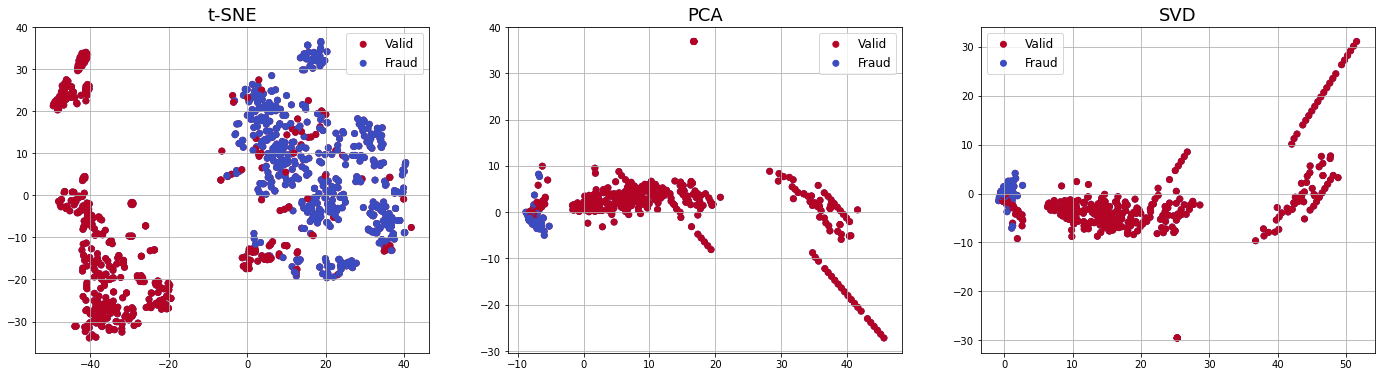

In [525]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 6))

ax1.scatter(x = X_tsne[:,0], y = X_tsne[:,1], c = (Y == 0), cmap = "coolwarm", label = "Valid")
ax1.scatter(x = X_tsne[:,0], y = X_tsne[:,1], c = (Y == 1), cmap = "coolwarm", label = "Fraud")
ax1.set_title("t-SNE", fontsize = 18)
ax1.legend(fontsize = 12)
ax1.grid(True)

ax2.scatter(x = X_pca[:,0], y = X_pca[:,1], c = (Y == 0), cmap = "coolwarm", label = "Valid")
ax2.scatter(x = X_pca[:,0], y = X_pca[:,1], c = (Y == 1), cmap = "coolwarm", label = "Fraud")
ax2.set_title("PCA", fontsize = 18)
ax2.legend(fontsize = 12)
ax2.grid(True)

ax3.scatter(x = X_svd[:,0], y = X_svd[:,1], c = (Y == 0), cmap = "coolwarm", label = "Valid")
ax3.scatter(x = X_svd[:,0], y = X_svd[:,1], c = (Y == 1), cmap = "coolwarm", label = "Fraud")
ax3.set_title("SVD", fontsize = 18)
ax3.legend(fontsize = 12)
ax3.grid(True)

t-SNE, PCA, and SVD cluster with pretty good accuracy

## Classification Models (training and evaluation)

In [543]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Split data into training and testing sets

In [544]:
print("X Type:", type(X), ", X Length:", len(X))
print("Y Type:", type(Y), ", Y Length:", len(Y))

X Type: <class 'numpy.ndarray'> , X Length: 947
Y Type: <class 'numpy.ndarray'> , Y Length: 947


In [545]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#### Cross Validation

In [546]:
from sklearn.model_selection import cross_val_score

In [547]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [552]:
for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_accuracy = cross_val_score(classifier, x_train, y_train, cv = 5)
    print(name, "has a training accuracy of", round(training_accuracy.mean(), 2))

Logistic Regression has a training accuracy of 0.94
K-Nearest Neighbors has a training accuracy of 0.94
Support Vector Classifier has a training accuracy of 0.93
Decision Tree Classifier has a training accuracy of 0.9


Accuracy of each classification models are very high even for cross validation 

#### Logistic Regression

In [553]:
from sklearn.model_selection import GridSearchCV

In [566]:
parameters_logreg = {"penalty" : ["l2"],
                     "C" : [0.001, 0.01, 0.1, 1, 10, 100],
                     "solver" : ["lbfgs"],
                    "max_iter" : [1000]}

In [567]:
LogReg = LogisticRegression()
LogReg_CV = GridSearchCV(LogReg, parameters_logreg, cv = 5).fit(x_train, y_train)

print("Best hyperparameters:", LogReg_CV.best_params_)
print("Best accuracy:", LogReg_CV.best_score_)

Best hyperparameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy: 0.9405716277448588


Use optimized hyperparameters to evaluate model

In [568]:
from sklearn.metrics import f1_score
LogReg_acc = LogReg_CV.score(x_test, y_test)
print("Logistic Regression Accuracy =", LogReg_acc)

yhat_LogReg = LogReg_CV.predict(x_test)
LogReg_f1 = f1_score(y_test, yhat_LogReg)
print("Logistic Regression F1 Score =", LogReg_f1)

Logistic Regression Accuracy = 0.9210526315789473
Logistic Regression F1 Score = 0.9246231155778893


#### K-Nearest Neighbors

In [573]:
parameters_knn = {"n_neighbors" : list(range(1, 11)),
                     "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                     "p" : [1, 2]}

In [575]:
KNN = KNeighborsClassifier()
KNN_CV = GridSearchCV(KNN, parameters_knn, cv = 5).fit(x_train, y_train)

print("Best hyperparameters:", KNN_CV.best_params_)
print("Best accuracy:", KNN_CV.best_score_)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
Best accuracy: 0.9418177065179506


Use optimized hyperparameters to evaluate model

In [576]:
KNN_acc = KNN_CV.score(x_test, y_test)
print("KNN Accuracy =", KNN_acc)

yhat_KNN = KNN_CV.predict(x_test)
KNN_f1 = f1_score(y_test, yhat_KNN)
print("KNN F1 Score =", KNN_f1)

KNN Accuracy = 0.9210526315789473
KNN F1 Score = 0.9214659685863874


#### Support Vector Classifier

In [578]:
parameters_svc = {"C" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                  "kernel" : ["rbf", "poly", "sigmoid", "linear"]}

In [579]:
svc = SVC()
svc_CV = GridSearchCV(svc, parameters_svc, cv = 5).fit(x_train, y_train)

print("Best hyperparameters:", svc_CV.best_params_)
print("Best accuracy:", svc_CV.best_score_)

Best hyperparameters: {'C': 0.5, 'kernel': 'linear'}
Best accuracy: 0.9445277100034856


Use optimized hyperparameters to evaluate model

In [580]:
svc_acc = svc_CV.score(x_test, y_test)
print("SVC Accuracy =", svc_acc)

yhat_svc = svc_CV.predict(x_test)
svc_f1 = f1_score(y_test, yhat_svc)
print("SVC F1 Score =", svc_f1)

SVC Accuracy = 0.9157894736842105
SVC F1 Score = 0.9191919191919192


#### Decision Tree Classifier

In [583]:
parameters_tree = {"criterion" : ["gini", "entropy"],
                   "splitter" : ["best", "random"],
                   "max_depth" : list(range(1, 11)),
                   "min_samples_leaf" : list(range(4, 8))}

In [584]:
tree = DecisionTreeClassifier()
tree_CV = GridSearchCV(tree, parameters_tree, cv = 5).fit(x_train, y_train)

print("Best hyperparameters:", tree_CV.best_params_)
print("Best accuracy:", tree_CV.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'splitter': 'best'}
Best accuracy: 0.9365109794353433


In [585]:
tree_acc = tree_CV.score(x_test, y_test)
print("Decision Tree Accuracy =", tree_acc)

yhat_tree = tree_CV.predict(x_test)
tree_f1 = f1_score(y_test, yhat_tree)
print("Decision Tree F1 Score =", tree_f1)

Decision Tree Accuracy = 0.9210526315789473
Decision Tree F1 Score = 0.9222797927461139


## Model Comparison

In [590]:
acc_dict = {"Logistic Regression" : LogReg_acc, 
            "K-Nearest Neighbors" : KNN_acc,
            "Support Vector Classifier" : svc_acc,
            "Decision Tree Classifier" : tree_acc}

Text(0, 0.5, 'Accuracy')

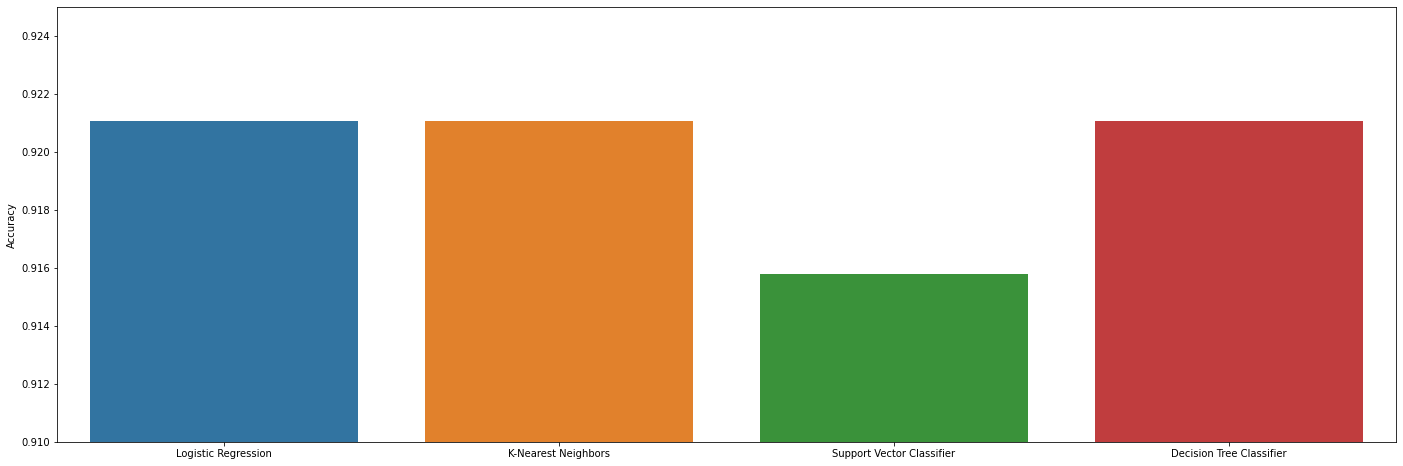

In [606]:
fig = plt.figure(figsize = (24, 8))
sns.barplot(x = list(acc_dict.keys()), y = list(acc_dict.values()))
plt.ylim(0.91, 0.925)
plt.ylabel("Accuracy")

In [607]:
f1_dict = {"Logistic Regression" : LogReg_f1, 
            "K-Nearest Neighbors" : KNN_f1,
            "Support Vector Classifier" : svc_f1,
            "Decision Tree Classifier" : tree_f1}

Text(0, 0.5, 'F1-Score')

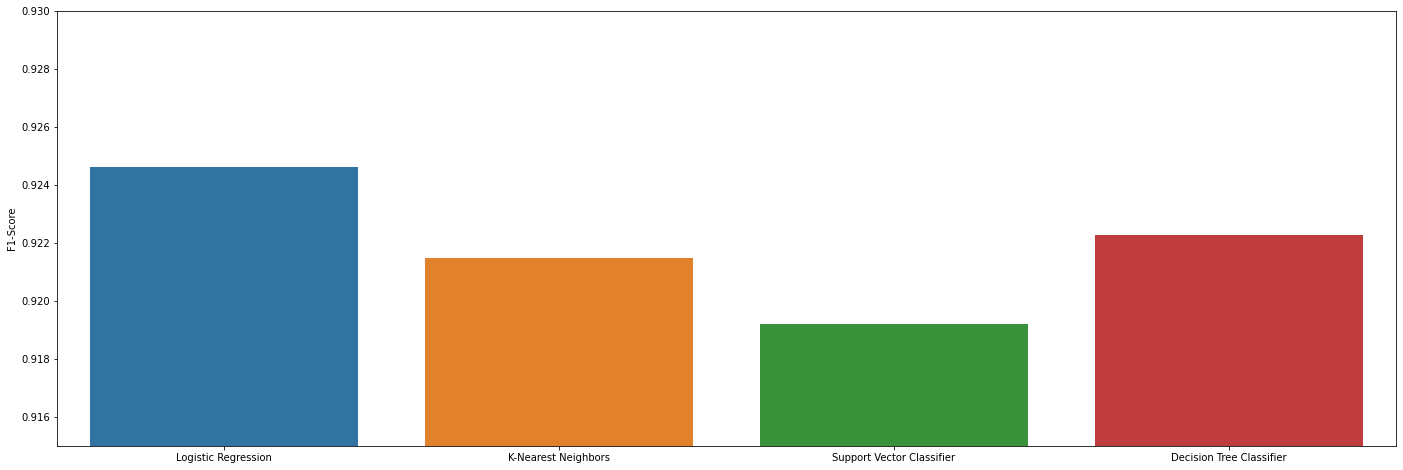

In [609]:
fig = plt.figure(figsize = (24, 8))
sns.barplot(x = list(f1_dict.keys()), y = list(f1_dict.values()))
plt.ylim(0.915, 0.93)
plt.ylabel("F1-Score")

All of the classification models have high degrees of predictive accuracy, but the Logistic Regression model appears to have the best fit. 

In [660]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report

# Test Case

print("Test Case")
print("")
print("Recall Score = {:.2f}".format(recall_score(y_test, yhat_LogReg)))
print("Precision Score = {:.2f}".format(precision_score(y_test, yhat_LogReg)))
print("F1 Score = {:.2f}".format(f1_score(y_test, yhat_LogReg)))
print("Accuracy Score = {:.2f}".format(accuracy_score(y_test, yhat_LogReg)))
print("")
print("Classification Report")
print("")
print(classification_report(y_test, yhat_LogReg))

print("-" * 70)
# Overfitting Case

yhat = LogReg_CV.predict(x_train)

print("Overfitting Case")
print("")
print("Recall Score = {:.2f}".format(recall_score(y_train, yhat)))
print("Precision Score = {:.2f}".format(precision_score(y_train, yhat)))
print("F1 Score = {:.2f}".format(f1_score(y_train, yhat)))
print("Accuracy Score = {:.2f}".format(accuracy_score(y_train, yhat)))
print("")
print("Classification Report")
print("")
print(classification_report(y_train, yhat))

Test Case

Recall Score = 0.90
Precision Score = 0.95
F1 Score = 0.92
Accuracy Score = 0.92

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        88
           1       0.95      0.90      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

----------------------------------------------------------------------
Overfitting Case

Recall Score = 0.94
Precision Score = 0.98
F1 Score = 0.96
Accuracy Score = 0.96

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       404
           1       0.98      0.94      0.96       353

    accuracy                           0.96       757
   macro avg       0.96      0.96      0.96       757
weighted avg       0.96      0.96      0.96       757



In [661]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LogReg_predict = cross_val_predict(LogReg_CV, x_train, y_train, cv = 5, method = "decision_function")
print("Logistic Regression Overfit ROC AUC Score =", roc_auc_score(y_train, LogReg_predict))

Logistic Regression Overfit ROC AUC Score = 0.9709421367065886


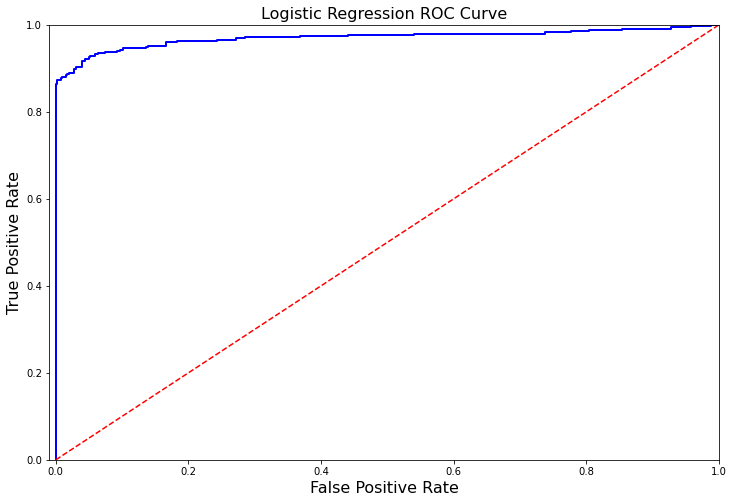

In [662]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, LogReg_predict)

def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title("Logistic Regression ROC Curve", fontsize=16)
    plt.plot(log_fpr, log_tpr, "b-", linewidth=2)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.axis([-0.01, 1, 0, 1])
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

As can be seen from the ROC curve, precision (accurate fraud predictions as a percent of all fraud predictions) begins to delcine between 0.90 and 0.92. However, precision is still high and recall (accurate fraud predictions as a percent of all actual fraudulent samples) is high. 

In [663]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    fig = plt.figure(figsize = (8, 5))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = "g");
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Valid', 'Fraud']); ax.yaxis.set_ticklabels(['Valid', 'Fraud'])

Oversampling Case


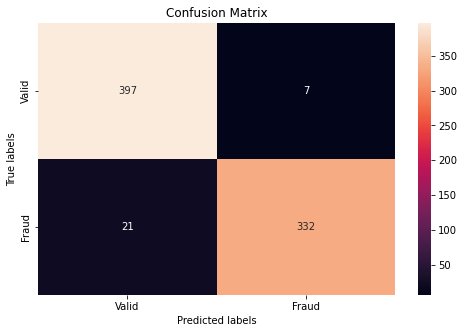

In [664]:
print("Oversampling Case")
plot_confusion_matrix(y_train, yhat)

Test Case


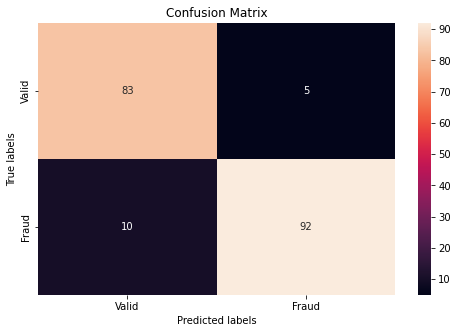

In [665]:
print("Test Case")
plot_confusion_matrix(y_test, yhat_LogReg)

In [666]:
X_total = df.drop("Class", axis = 1).values
Y_total = df["Class"].values

Full Dataset


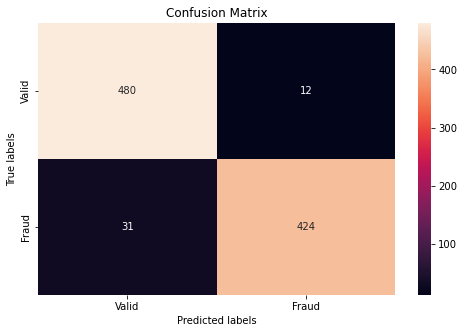

In [667]:
yhat_total = LogReg_CV.predict(X)
print("Full Dataset")
plot_confusion_matrix(Y, yhat_total)